# Keras
is like a high-performance automatic car that takes care of most of the driving for you.

## keras with tensorflow.

# Pytorch
PyTorch is like a high-performance manual car that gives you more control over every aspect of the driving experience.


# Convolutional Neural Network
 Learn the following

Loading dataset

Preprocessing the dataset

Structure of Convolutional Neural Network

Training a Convolutional Neural Network

Testing a Convolutional Neural Network

In [54]:
!pip install keras
!pip install tensorflow

In [55]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


In [56]:
# check for available devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18382621869299319801
xla_global_id: -1
]


# Data splitting

In [57]:
# loading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

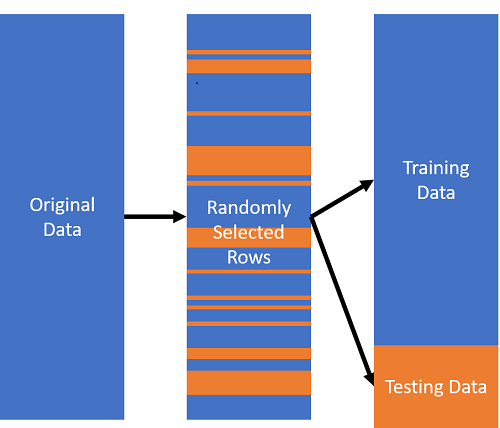

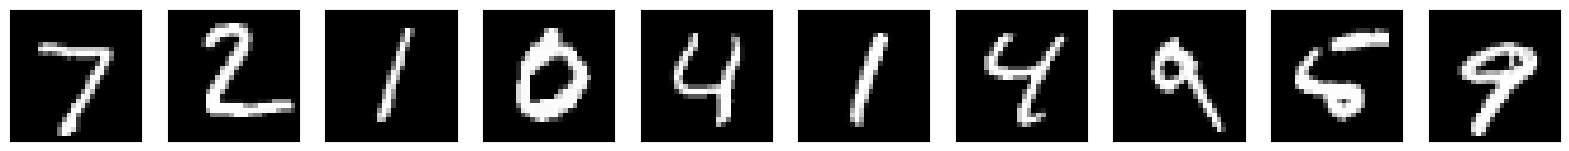

In [58]:
import matplotlib.pyplot as plt
# numbers of digits to display
n= 10
# create a figure to display the images
plt.figure(figsize=(20,4))

# loop through frist n images
for i in range(n):
  axis = plt.subplot(2, n, i+1)  #CRAETE a subplot within the figure  -- it will create a x_axis and y_axis for image
  plt.imshow(x_test[i].reshape(28, 28))  #display the original image   -- this will show colored yellow picture with purple backend
  plt.gray()                             #set colormap to grayscale
  #hide x_axis and y_label labels and ticks
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)       #all numbers that shows on axis like 0,5,10 remove
# show the figure with
plt.show()

# close the fig
plt.close()

# Displaying the Shapes of dataset

In [59]:
#Dataset Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


# Reshaping the data

In [60]:
# Reshaping Data in "Channel Last" format for consumption of Tensorflow backend
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


# Min Max Scalling

In [62]:
#converting to floating point and normalizing pixel values in range [0,1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255



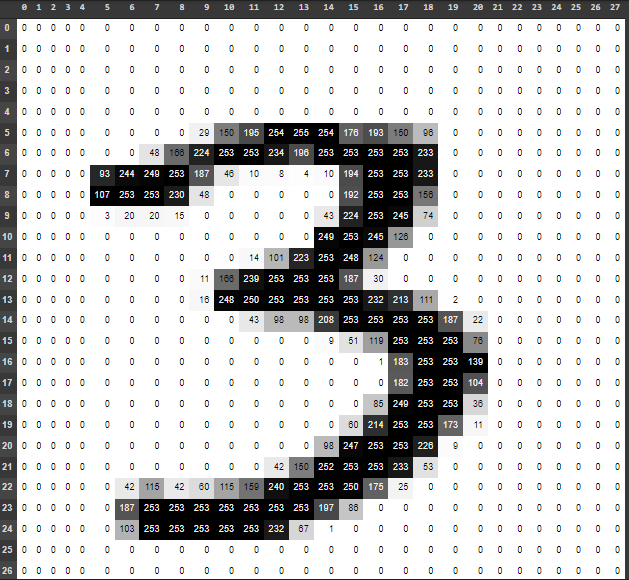

# One Hot encoding

In [63]:
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# seeing updates Shapes
print("x_train Sahpe : ", x_train.shape)
print("y_train Sahpe : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train Sahpe :  (60000, 28, 28, 1)
y_train Sahpe :  (60000, 10)
x_test shape :  (10000, 28, 28, 1)
y_test shape :  (10000, 10)


# **Building the CNN**

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.layers import Conv2D, MaxPooling2D

In [65]:
# Define the dimensions of the input image
img_rows, img_cols,channels= 28,28,1  # 1 for greyscale images and 3 for rgb images

# Define the number of filters for each layer of the CNN
filters = [6, 32, 80, 120] # These are the number of filters in each layer of the CNN

# Define the number of classes for classification
classes = 10 # This is the number of different categories that the CNN will classify images into


 # Creating Model

In [66]:
# Creating Model

model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 80)         

# **Parameters Calculations in CNN**
(filter_height * filter_width * input_channels + 1) * number_of_filters = parameters

**Layer_1= (3x3x1+1)x6=60**


**Layer_2= (2x2x6+1)x32=800**


# **Training the CNN**

In [68]:
#  train the model
model.fit(x_train,y_train, validation_split=0.2, epochs=15,batch_size=64, verbose=1)


Epoch 1/15
750/750 [==============================] - 53s 69ms/step - loss: 2.0469 - accuracy: 0.3467 - val_loss: 1.0065 - val_accuracy: 0.6617
Epoch 2/15
750/750 [==============================] - 31s 41ms/step - loss: 0.4877 - accuracy: 0.8460 - val_loss: 0.2629 - val_accuracy: 0.9180
Epoch 3/15
750/750 [==============================] - 32s 43ms/step - loss: 0.2240 - accuracy: 0.9292 - val_loss: 0.1661 - val_accuracy: 0.9452
Epoch 4/15
750/750 [==============================] - 28s 37ms/step - loss: 0.1576 - accuracy: 0.9507 - val_loss: 0.1337 - val_accuracy: 0.9587
Epoch 5/15
750/750 [==============================] - 27s 36ms/step - loss: 0.1248 - accuracy: 0.9602 - val_loss: 0.1032 - val_accuracy: 0.9681
Epoch 6/15
750/750 [==============================] - 26s 35ms/step - loss: 0.1044 - accuracy: 0.9664 - val_loss: 0.0970 - val_accuracy: 0.9696
Epoch 7/15
750/750 [==============================] - 29s 39ms/step - loss: 0.0910 - accuracy: 0.9719 - val_loss: 0.0902 - val_accuracy:

In [69]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.982


In [70]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[20:40]
actual_labels = y_test[20:40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 26ms/step


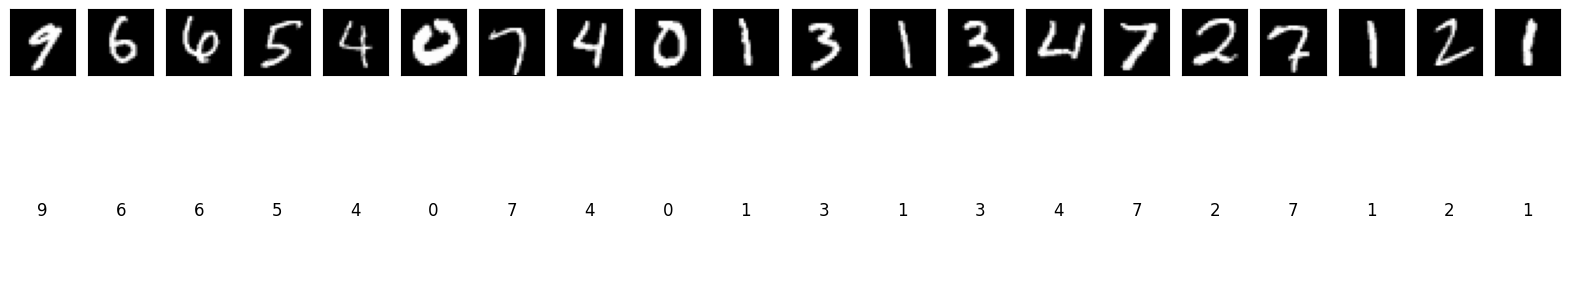

In [71]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    axis = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    axis = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()


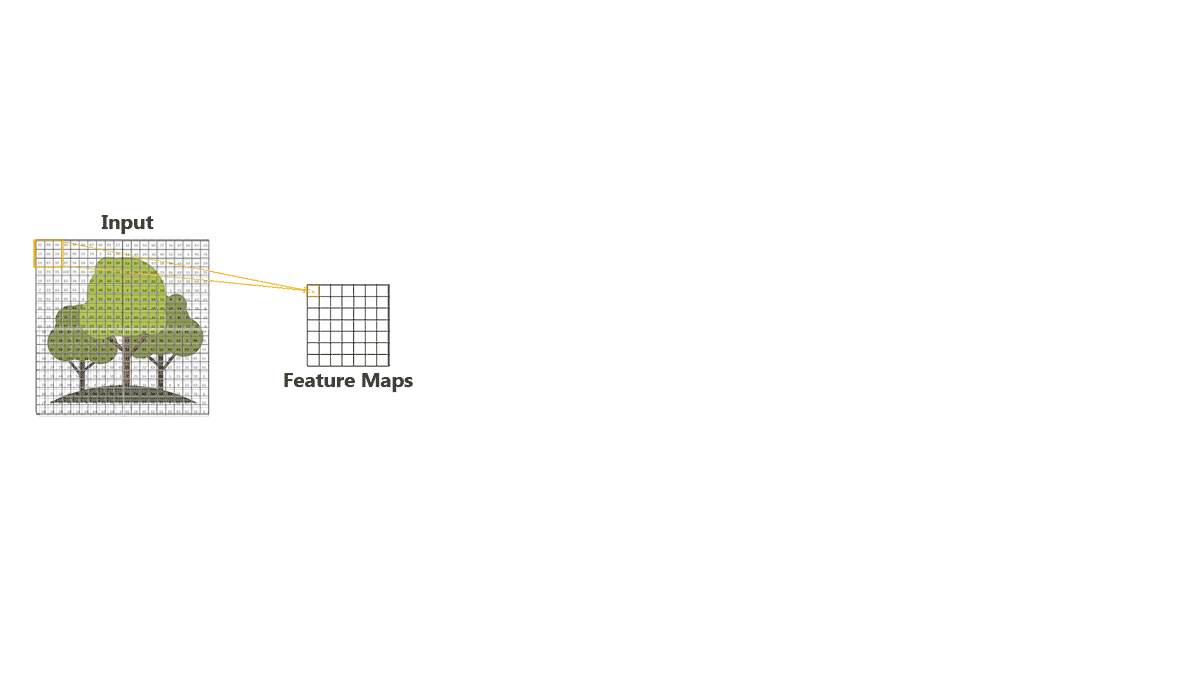